TASK 1 : TABLE BOOKING AND ONLINE DELIVERY

In [99]:
import warnings
warnings.filterwarnings("ignore")

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df = pd.read_csv("C:/Users/rishi/OneDrive/Documents/cognifyz internship/Dataset .csv")

In [102]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [104]:
df["Has Table booking"].value_counts()

Has Table booking
No     8393
Yes    1158
Name: count, dtype: int64

In [105]:
df["Has Online delivery"].value_counts()

Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64

In [106]:
print("Table Booking : ", round((1158/(8393+1158)) *100, 2),"%")
print("Online Delivery : ", round((2451/(7100+2451)) *100, 2), "%")

Table Booking :  12.12 %
Online Delivery :  25.66 %


compare the average ratings of restaurants with table booking and those without

In [107]:
df_with_table_booking= df[df['Has Table booking'] == 'Yes']
df_without_table_booking= df[df['Has Table booking'] == 'No']
print("Rows With Table Booking :",df_with_table_booking.shape)
print("Rows Without Table Booking :",df_without_table_booking.shape)

Rows With Table Booking : (1158, 21)
Rows Without Table Booking : (8393, 21)


In [108]:
print("Average Ratings:")
print(" With Table Booking : ", round(df_with_table_booking["Aggregate rating"].mean(),2))
print(" Without Table Booking : ", round(df_without_table_booking["Aggregate rating"].mean(),2))

Average Ratings:
 With Table Booking :  3.44
 Without Table Booking :  2.56


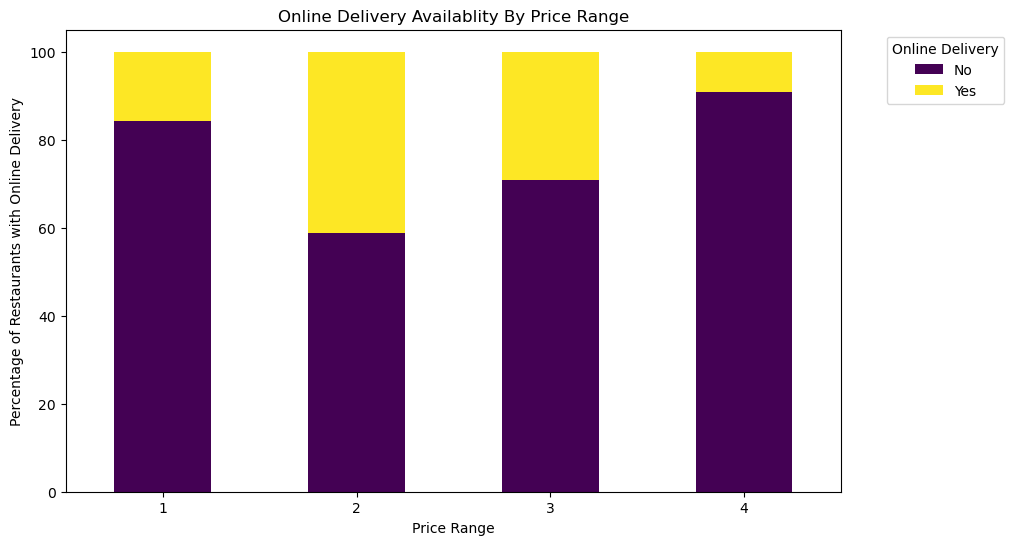

In [110]:
online_Delivery_by_price_range = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack()*100
online_Delivery_by_price_range.plot(kind='bar',stacked=True, colormap='viridis', figsize=(10,6))
plt.title('Online Delivery Availablity By Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants with Online Delivery')
plt.xticks(rotation=0)
plt.legend(title='Online Delivery',bbox_to_anchor=(1.05,1))
plt.show()

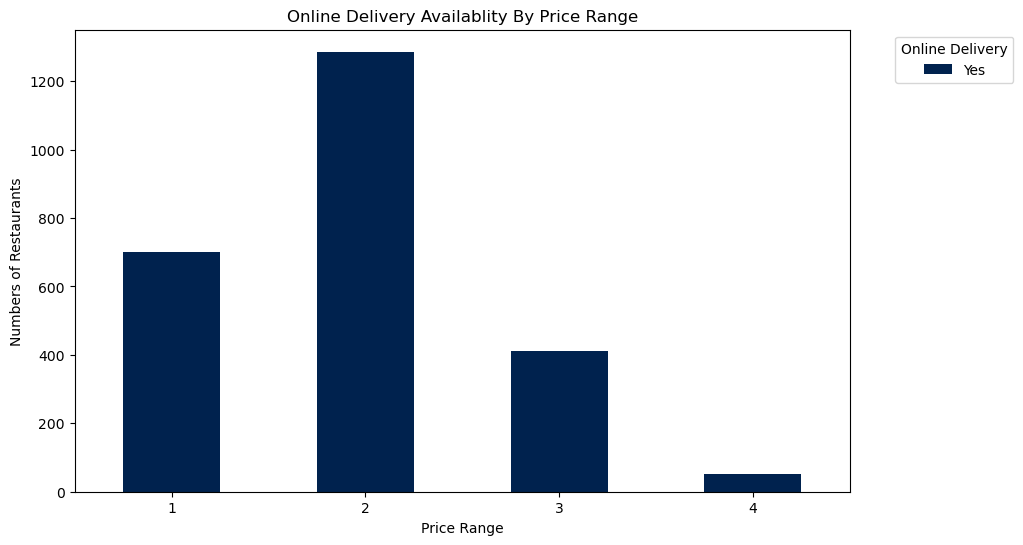

In [114]:
Online_Delivery_Yes = df[df['Has Online delivery'] == 'Yes']
Online_Delivery_counts = Online_Delivery_Yes.groupby(['Price range', 'Has Online delivery']).size().unstack()
Online_Delivery_counts.plot(kind='bar',stacked=True, colormap='cividis',figsize=(10,6))
plt.title('Online Delivery Availablity By Price Range')
plt.xlabel('Price Range')
plt.ylabel('Numbers of Restaurants')
plt.xticks(rotation=0)
plt.legend(title='Online Delivery',bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


TASK 2 : PRICE RANGE ANALYSIS

In [115]:
df["Price range"].value_counts()

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

In [116]:
most_common = df["Price range"].mode()[0]
print("Most Common Price range among all the restaurants : ",most_common)

Most Common Price range among all the restaurants :  1


In [117]:
Avg_Rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean().round(2)
print("Average Rating for each price range :")
print(Avg_Rating_by_price_range)

Average Rating for each price range :
Price range
1    2.00
2    2.94
3    3.68
4    3.82
Name: Aggregate rating, dtype: float64


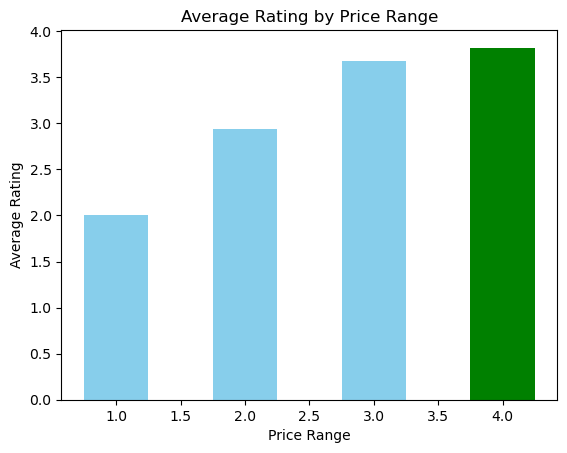

In [119]:
highest_avg_rating_color = Avg_Rating_by_price_range.idxmax()
plt.bar(Avg_Rating_by_price_range.index, Avg_Rating_by_price_range, color='skyblue',width=0.5)
plt.bar(highest_avg_rating_color, Avg_Rating_by_price_range[highest_avg_rating_color],color='green',width=0.5)
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.title('Average Rating by Price Range')
plt.show()

TASK 3 : FEATURE ENGINEERING

In [121]:
df['Restaurant Name length']= df['Restaurant Name'].apply(lambda x: len(str(x)))
df['Address Length'] = df['Address'].apply(lambda x: len(str(x)))

In [125]:
df[['Restaurant Name','Restaurant Name length','Address','Address Length']]

,Restaurant Name,Restaurant Name length,Address,Address Length
0,Le Petit Souffle,16,"Third Floor, Century City Mall, Kalayaan Avenu...",71
1,Izakaya Kikufuji,16,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",67
2,Heat - Edsa Shangri-La,22,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",56
3,Ooma,4,"Third Floor, Mega Fashion Hall, SM Megamall, O...",70
4,Sambo Kojin,11,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",64
...,...,...,...,...
9546,Naml۱ Gurme,11,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",103
9547,Ceviz A��ac۱,12,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",77
9548,Huqqa,5,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",73
9549,A���k Kahve,11,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",75


In [126]:
df['Has Table Booking']= df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Has Online Delivery'] = df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)

In [127]:
df[['Has Table booking','Has Table Booking','Has Online delivery','Has Online Delivery']]

,Has Table booking,Has Table Booking,Has Online delivery,Has Online Delivery
0,Yes,1,No,0
1,Yes,1,No,0
2,Yes,1,No,0
3,No,0,No,0
4,Yes,1,No,0
...,...,...,...,...
9546,No,0,No,0
9547,No,0,No,0
9548,No,0,No,0
9549,No,0,No,0
